# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
from sklearn import metrics
from numpy import linalg as la

# Reading the files

In [2]:
X_train=pd.read_csv("hw1xtr.dat", header=None)
y_train=pd.read_csv("hw1ytr.dat", header=None)
X_test=pd.read_csv("hw1xte.dat", header=None)
y_test=pd.read_csv("hw1yte.dat", header=None)

# Sorting the data 

In [3]:
X = pd.concat([X_train,y_train], axis=1)
X.columns=["x","y"]
X = X.sort_values(["x","y"], axis = 0, ascending = True)
X_train = pd.DataFrame()
y_train = pd.DataFrame()
X_train = X[["x"]]
y_train = X[["y"]]
Y = pd.concat([X_test,y_test], axis=1)
Y.columns = ["x","y"]
Y = Y.sort_values(["x","y"], axis = 0, ascending = True)
X_test = pd.DataFrame()
y_test = pd.DataFrame()
X_test = Y[["x"]]
y_test = Y[["y"]]

# Plotting the train data

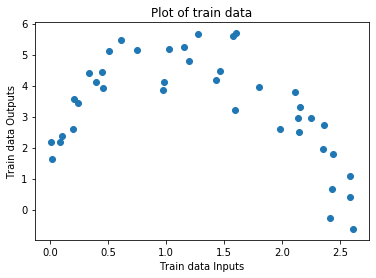

In [4]:
ply.scatter(X_train,y_train)
ply.xlabel("Train data Inputs")
ply.ylabel("Train data Outputs")
ply.title("Plot of train data")
ply.show()

# Plotting the test data

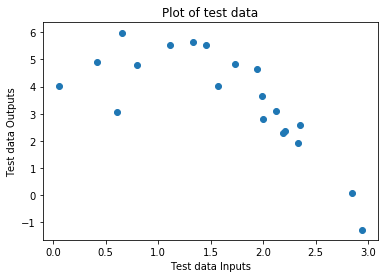

In [5]:
ply.scatter(X_test,y_test)
ply.xlabel("Test data Inputs")
ply.ylabel("Test data Outputs")
ply.title("Plot of test data")
ply.show()

# Linear Regression

In [6]:
row, col = X_train.shape
ones = np.ones((row,1)) # creating a column vector of 1's
X_train_linear = np.hstack((ones, X_train)) # stacking the 1's column vector to the train data
inv = np.linalg.inv((X_train_linear.transpose())@(X_train_linear)) 
mul_1 = (inv @ (X_train_linear.transpose()))
w_linear = (mul_1 @ (y_train))
y_linear = X_train_linear @ w_linear #predicted y for the training data
y_linear 

,y
0,4.353832
1,4.342832
2,4.288711
3,4.276395
4,4.204024
5,4.196727
6,4.167860
7,4.090197
8,4.048382
9,4.004822


# Plotting of regression line with train data

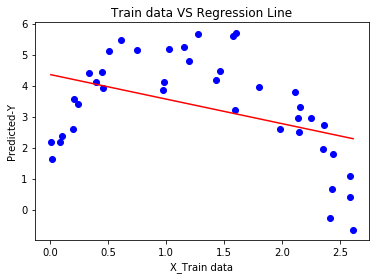

In [7]:
ply.scatter(X_train, y_train, color="blue")
#ply.plot([np.min(X_train),np.max(X_train)],[np.min(y_linear),np.max(y_linear)],color ="red")
ply.xlabel("X_Train data")
ply.ylabel("Predicted-Y")
ply.plot(X_train, y_linear,color="red")
ply.title("Train data VS Regression Line")
ply.show()

# Mean square error on train data

In [8]:
Mean_square_error = np.square(np.subtract(y_train,y_linear)).mean()
Mean_square_error

y    2.173946
dtype: float64

# Plotting of regression line with test data

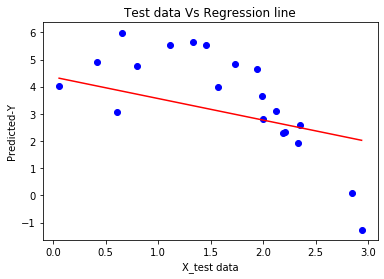

In [9]:
row, col = X_test.shape
ones = np.ones((row,1)) 
X_test_linear = np.hstack((ones, X_test))
Y_test_linear = X_test_linear @ w_linear
ply.scatter(X_test, y_test, color="blue")
ply.plot(X_test, Y_test_linear,color ="red")
#ply.plot([np.min(X_test),np.max(X_test)],[np.min(Y_test_linear),np.max(Y_test_linear)],color ="red")
ply.xlabel("X_test data")
ply.ylabel("Predicted-Y")
ply.title("Test data Vs Regression line")
ply.show()

# Mean Square error on test data

In [10]:
Mean_square_error_test = np.square(np.subtract(y_test,Y_test_linear)).mean()
Mean_square_error_test

y    2.311875
dtype: float64

# Second Order Polynomial Regression

In [11]:
row, col = X_train.shape
ones = np.ones((row,1)) # creating a coulumn vector of 1's
X_polynomial_2 = abs(np.power(X_train, 2)) 
X_train_concat = np.hstack((ones, X_train))
X_train_second_polynomial = np.hstack((X_train_concat, X_polynomial_2))
X_train_second_poly_trans = X_train_second_polynomial.transpose()
mul_1 = np.linalg.inv(X_train_second_poly_trans @ X_train_second_polynomial)
w_second_poly = (mul_1@(X_train_second_poly_trans @ y_train)) #weights of second degree polynomial regression
y_second_polynomial = (X_train_second_polynomial)@(w_second_poly) #predicted y of second degreee polynomial
y_second_polynomial 

,y
0,2.202758
1,2.274290
2,2.613363
3,2.687533
4,3.101028
5,3.140598
6,3.293328
7,3.674036
8,3.860778
9,4.041743


# Plotting of second order polynomial regression with train data

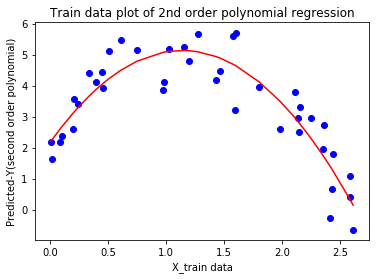

In [12]:
ply.scatter(X_train, y_train, color="blue")
ply.plot(X_train, y_second_polynomial, color = "red")
ply.xlabel("X_train data")
ply.ylabel("Predicted-Y(second order polynomial)")
ply.title("Train data plot of 2nd order polynomial regression")
ply.show()

# Mean Square Error on train data set for second order polynomial

In [13]:
Mean_square_error_train = np.square(np.subtract(y_train,y_second_polynomial)).mean()
Mean_square_error_train

y    0.484685
dtype: float64

# Plotting of Second Order polynomial regression with test data

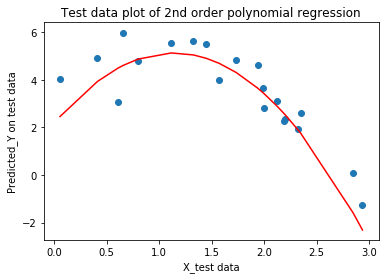

In [14]:
X_polynomial_2 = abs(np.power(X_test, 2))
X_test_polynomial_second = np.hstack((X_test_linear, X_polynomial_2))
Y_test_polynomial_second = X_test_polynomial_second@w_second_poly
ply.scatter(X_test,y_test)
ply.plot(X_test, Y_test_polynomial_second, color = "red")
ply.xlabel("X_test data")
ply.ylabel("Predicted_Y on test data")
ply.title("Test data plot of 2nd order polynomial regression")
ply.show()

# Mean square error on test data for second order polynomial

In [15]:
Mean_square_error_test = np.square(np.subtract(y_test,Y_test_polynomial_second)).mean()
Mean_square_error_test

y    0.757364
dtype: float64

# Which model is best fit linear regression / second order/ polynomial regression

In comparision to the errors of testing in "linear regression", "Second degree polynomial" regression is the best fit rather than linear regression because of low testing error.

# Third Order Polynomial Regression 

In [16]:
X_polynomial_3 = abs(np.power(X_train, 3))
X_train_third_polynomial = np.hstack((X_train_second_polynomial, X_polynomial_3))
X_train_third_poly_trans = X_train_third_polynomial.transpose()
mul_1 = np.linalg.inv(X_train_third_poly_trans @ X_train_third_polynomial)
w_third_poly = (mul_1@(X_train_third_poly_trans @ y_train))
y_third_polynomial = (X_train_third_polynomial)@(w_third_poly)
y_third_polynomial

,y
0,2.084788
1,2.165792
2,2.547684
3,2.630742
4,3.090368
5,3.134029
6,3.301979
7,3.716318
8,3.917011
9,4.109632


# Plotting of third order polynomial regression with train data

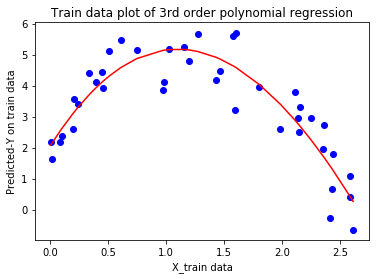

In [17]:
ply.scatter(X_train, y_train, color="blue")
ply.plot(X_train, y_third_polynomial, color = "red")
ply.xlabel("X_train data")
ply.ylabel("Predicted-Y on train data")
ply.title("Train data plot of 3rd order polynomial regression")
ply.show()

# Mean square error on train data for third order polynomial regression

In [18]:
Mean_square_error_train = np.square(np.subtract(y_train,y_third_polynomial)).mean()
Mean_square_error_train

y    0.480552
dtype: float64

# Plotting of third order polynomial regression with test data

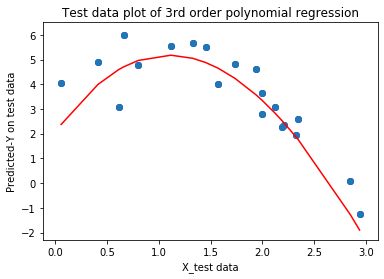

In [19]:
ply.scatter(X_test, y_test, color="blue")
X_polynomial_3 = abs(np.power(X_test, 3))
X_test_polynomial_third = np.hstack((X_test_polynomial_second, X_polynomial_3))
Y_test_polynomial_third = X_test_polynomial_third@w_third_poly
ply.scatter(X_test,y_test)
ply.plot(X_test, Y_test_polynomial_third, color = "red")
ply.xlabel("X_test data")
ply.ylabel("Predicted-Y on test data")
ply.title("Test data plot of 3rd order polynomial regression")
ply.show()

# Mean squared error on test data for third order polynomial regression

In [20]:
Mean_square_error_test = np.square(np.subtract(y_test,Y_test_polynomial_third)).mean()
Mean_square_error_test

y    0.691125
dtype: float64

# Which model is best fit linear regression / second order/ third order polynomial regression

In comparision to the errors of "linear regression" and "second order polynomial regression", "third order polynomial" regression is the best fit rather than second order polynomial regression and linear regression because of low testing error. 

# Fourth order polynomial regression

In [21]:
X_polynomial_4 = abs(np.power(X_train, 4))
X_train_fourth_polynomial = np.hstack((X_train_third_polynomial, X_polynomial_4))
X_train_fourth_poly_trans = X_train_fourth_polynomial.transpose()
mul_1 = np.linalg.inv(X_train_fourth_poly_trans @ X_train_fourth_polynomial)
w_fourth_poly = (mul_1@(X_train_fourth_poly_trans @ y_train))
y_fourth_polynomial = (X_train_fourth_polynomial)@(w_fourth_poly)
y_fourth_polynomial

,y
0,1.699467
1,1.830772
2,2.424319
3,2.547725
4,3.192387
5,3.250159
6,3.466564
7,3.959238
8,4.175436
9,4.368010


# Plotting of fourth order polynomial regression with train data set 

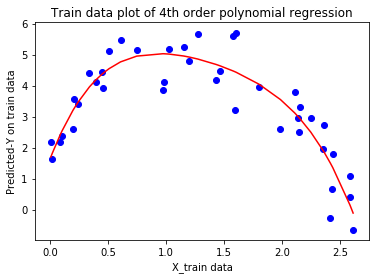

In [22]:
ply.scatter(X_train, y_train, color="blue")
ply.plot(X_train, y_fourth_polynomial, color = "red")
ply.xlabel("X_train data")
ply.ylabel("Predicted-Y on train data")
ply.title("Train data plot of 4th order polynomial regression")
ply.show()

# Mean square error on train data for fourth order polynomial regression

In [23]:
Mean_square_error_train = np.square(np.subtract(y_train,y_fourth_polynomial)).mean()
Mean_square_error_train

y    0.436648
dtype: float64

# Plotting of fourth order polynomial regression with test data set

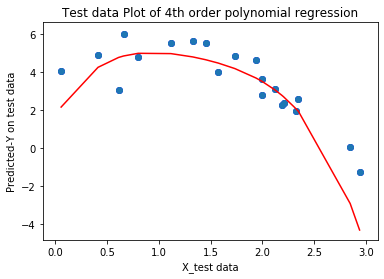

In [24]:
ply.scatter(X_test, y_test, color="blue")
X_polynomial_4 = abs(np.power(X_test, 4))
X_test_polynomial_fourth = np.hstack((X_test_polynomial_third, X_polynomial_4))
Y_test_polynomial_fourth = X_test_polynomial_fourth@w_fourth_poly
ply.scatter(X_test,y_test)
ply.plot(X_test, Y_test_polynomial_fourth, color = "red")
ply.xlabel("X_test data")
ply.ylabel("Predicted-Y on test data")
ply.title("Test data Plot of 4th order polynomial regression")
ply.show()

# Mean Squared error on test data set for fourth order polynomial regression

In [25]:
Mean_square_error_test = np.square(np.subtract(y_test,Y_test_polynomial_fourth)).mean()
Mean_square_error_test

y    1.558469
dtype: float64

# Which order of polynomial/linear regression is best fit for the data

After comparing the testing errors of "linear regression", "second order polynomial regression", "third order polynomial regression", "fourth order polynomial regression", "THIRD ORDER POLYNOMIAL REGRESSION" is the best fit because of low testing error when compared to all other models.

# L2 norm regularization on fourth order polynomial

In [26]:
I = np.identity(5)
I[0,0] = 0
I

array([[0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# Regularization parameter λ = 0.01

In [27]:
X_train_polynomial_fourth_trans = X_train_fourth_polynomial.transpose()
mul_1 = X_train_polynomial_fourth_trans @ X_train_fourth_polynomial
mul_2 = mul_1 + 0.01*(I)
inv = np.linalg.inv(mul_2)
w_l_00_1 = inv@(X_train_polynomial_fourth_trans@y_train)
y_l_00_1 = X_train_fourth_polynomial @ w_l_00_1
y_l_00_1


,y
0,1.971048
1,2.072620
2,2.538835
3,2.637421
4,3.164175
5,3.212516
6,3.395637
7,3.827494
8,4.025947
9,4.209381


# Training Error on L2 norm Regularization λ = 0.01

In [28]:
Mean_square_error_train_001 = np.square(np.subtract(y_train,y_l_00_1)).mean()
Mean_square_error_train_001

y    0.447669
dtype: float64

# Testing Error on L2 norm Regularization λ = 0.01

In [29]:
Y_test_regularization_00_1 = X_test_polynomial_fourth@w_l_00_1
Mean_square_error_test_001 = np.square(np.subtract(y_test,Y_test_regularization_00_1)).mean()
Mean_square_error_test_001

y    1.114236
dtype: float64

 # Average error on train and test data for λ = 0.01

In [30]:
vals = [Mean_square_error_train_001, Mean_square_error_test_001]
avg_error_l00_1 = np.mean(vals)
avg_error_l00_1

0.7809525653798883

# Regularization parameter λ = 0.1

In [31]:
X_train_polynomial_fourth_trans = X_train_fourth_polynomial.transpose()
mul_1 = X_train_polynomial_fourth_trans @ X_train_fourth_polynomial
mul_2 = mul_1 + 0.1*(I)
inv = np.linalg.inv(mul_2)
w_l_0_1 = inv@(X_train_polynomial_fourth_trans@y_train)
y_l_0_1 = X_train_fourth_polynomial @ w_l_0_1
y_l_0_1

,y
0,2.453754
1,2.508102
2,2.770010
3,2.828268
4,3.159731
5,3.192066
6,3.317922
7,3.639321
8,3.801300
9,3.961276


# Training Error on L2 norm Regularization λ = 0.1

In [32]:
Mean_square_error_train_01 = np.square(np.subtract(y_train,y_l_0_1)).mean()
Mean_square_error_train_01

y    0.507647
dtype: float64

# Testing Error on L2 norm Regularization λ = 0.1

In [33]:
Y_test_regularization_0_1 = X_test_polynomial_fourth@w_l_0_1
Mean_square_error_test_01 = np.square(np.subtract(y_test,Y_test_regularization_0_1)).mean()
Mean_square_error_test_01

y    0.759218
dtype: float64

 # Average error on train and test data for λ = 0.1

In [34]:
vals = [Mean_square_error_train_01, Mean_square_error_test_01]
avg_error_l0_1 = np.mean(vals)
avg_error_l0_1

0.6334326084512022

# Regularization parameter λ = 1

In [35]:
X_train_polynomial_fourth_trans = X_train_fourth_polynomial.transpose()
mul_1 = X_train_polynomial_fourth_trans @ X_train_fourth_polynomial
mul_2 = mul_1 + 1*(I)
inv = np.linalg.inv(mul_2)
w_l1 = inv@(X_train_polynomial_fourth_trans@y_train)
y_l1 = X_train_fourth_polynomial @ w_l1
y_l1

,y
0,3.027842
1,3.051950
2,3.172662
3,3.200555
4,3.366794
5,3.383721
6,3.450869
7,3.631968
8,3.728949
9,3.828929


# Training Error on L2 norm Regularization λ = 1

In [36]:
Mean_square_error_train_1 = np.square(np.subtract(y_train,y_l1)).mean()
Mean_square_error_train_1

y    0.614385
dtype: float64

# Testing Error on L2 norm Regularization λ = 1

In [37]:
Y_test_regularization_1 = X_test_polynomial_fourth@w_l1
Mean_square_error_test_1 = np.square(np.subtract(y_test,Y_test_regularization_1)).mean()
Mean_square_error_test_1

y    1.192095
dtype: float64

# Average error on train and test data for λ = 1

In [38]:
vals = [Mean_square_error_train_1, Mean_square_error_test_1]
avg_error_l_1 = np.mean(vals)
avg_error_l_1

0.9032398345644048

# Regularization parameter λ = 10

In [39]:
X_train_polynomial_fourth_trans = X_train_fourth_polynomial.transpose()
mul_1 = X_train_polynomial_fourth_trans @ X_train_fourth_polynomial
mul_2 = mul_1 + 10*(I)
inv = np.linalg.inv(mul_2)
w_l10 = inv@(X_train_polynomial_fourth_trans@y_train)
y_l10 = X_train_fourth_polynomial @ w_l10
y_l10

,y
0,3.582368
1,3.588929
2,3.623246
3,3.631540
4,3.684013
5,3.689660
6,3.712633
7,3.779355
8,3.818087
9,3.860334


# Training Error on L2 norm Regularization λ = 10

In [40]:
Mean_square_error_train_10 = np.square(np.subtract(y_train,y_l10)).mean()
Mean_square_error_train_10

y    0.7992
dtype: float64

# Testing Error on L2 norm Regularization λ = 10

In [41]:
Y_test_regularization_10 = X_test_polynomial_fourth@w_l10
Mean_square_error_test_10 = np.square(np.subtract(y_test,Y_test_regularization_10)).mean()
Mean_square_error_test_10

y    1.569712
dtype: float64

# Average error on train and test data for  λ = 10

In [42]:
vals = [Mean_square_error_train_10, Mean_square_error_test_10]
avg_error_l_10 = np.mean(vals)
avg_error_l_10

1.1844558929040925

# Regularization parameter λ = 100

In [43]:
X_train_polynomial_fourth_trans = X_train_fourth_polynomial.transpose()
mul_1 = X_train_polynomial_fourth_trans @ X_train_fourth_polynomial
mul_2 = mul_1 + 100*(I)
inv = np.linalg.inv(mul_2)
w_l100 = inv@(X_train_polynomial_fourth_trans@y_train)
y_l100 = X_train_fourth_polynomial @ w_l100
y_l100

,y
0,4.054254
1,4.055638
2,4.063062
3,4.064898
4,4.076810
5,4.078116
6,4.083466
7,4.099194
8,4.108345
9,4.118249


# Training Error on L2 norm Regularization λ = 100

In [44]:
Mean_square_error_train_100 = np.square(np.subtract(y_train,y_l100)).mean()
Mean_square_error_train_100

y    1.064087
dtype: float64

# Testing Error on L2 norm Regularization λ = 100

In [45]:
Y_test_regularization_100 = X_test_polynomial_fourth@w_l100
Mean_square_error_test_100 = np.square(np.subtract(y_test,Y_test_regularization_100)).mean()
Mean_square_error_test_100

y    0.97922
dtype: float64

# Average error on train and test data for  λ = 100

In [46]:
vals = [Mean_square_error_train_100, Mean_square_error_test_100]
avg_error_l_100 = np.mean(vals)
avg_error_l_100

1.0216531528100126

# Regularization parameter λ = 1000

In [47]:
X_train_polynomial_fourth_trans = X_train_fourth_polynomial.transpose()
mul_1 = X_train_polynomial_fourth_trans @ X_train_fourth_polynomial
mul_2 = mul_1 + 1000*(I)
inv = np.linalg.inv(mul_2)
w_l1000 = inv@(X_train_polynomial_fourth_trans@y_train)
y_l1000 = X_train_fourth_polynomial @ w_l1000
y_l1000

,y
0,4.159295
1,4.159422
2,4.160069
3,4.160216
4,4.161021
5,4.161090
6,4.161330
7,4.161545
8,4.161265
9,4.160545


# Training Error on L2 norm Regularization λ = 1000

In [48]:
Mean_square_error_train_1000 = np.square(np.subtract(y_train,y_l1000)).mean()
Mean_square_error_train_1000

y    1.245046
dtype: float64

# Testing Error on L2 norm Regularization λ = 1000

In [49]:
Y_test_regularization_1000 = X_test_polynomial_fourth@w_l1000
Mean_square_error_test_1000 = np.square(np.subtract(y_test,Y_test_regularization_1000)).mean()
Mean_square_error_test_1000

y    0.951779
dtype: float64

# Average error on train and test data for  λ = 1000

In [50]:
vals = [Mean_square_error_train_1000, Mean_square_error_test_1000]
avg_error_l_1000 = np.mean(vals)
avg_error_l_1000

1.0984121226138228

# Regularization parameter λ = 10000

In [51]:
X_train_polynomial_fourth_trans = X_train_fourth_polynomial.transpose()
mul_1 = X_train_polynomial_fourth_trans @ X_train_fourth_polynomial
mul_2 = mul_1 + 10000*(I)
inv = np.linalg.inv(mul_2)
w_l10000 = inv@(X_train_polynomial_fourth_trans@y_train)
y_l10000 = X_train_fourth_polynomial @ w_l10000
y_l10000

,y
0,3.799142
1,3.799133
2,3.799059
3,3.799032
4,3.798757
5,3.798715
6,3.798511
7,3.797597
8,3.796804
9,3.795678


# Training Error on L2 norm Regularization λ = 10000

In [52]:
Mean_square_error_train_10000 = np.square(np.subtract(y_train,y_l10000)).mean()
Mean_square_error_train_10000

y    1.588663
dtype: float64

# Testing Error on L2 norm Regularization λ = 10000

In [53]:
Y_test_regularization_10000 = X_test_polynomial_fourth@w_l10000
Mean_square_error_test_10000 = np.square(np.subtract(y_test,Y_test_regularization_10000)).mean()
Mean_square_error_test_10000

y    1.500048
dtype: float64

# Average error on train and test data for  λ = 10000

In [54]:
vals = [Mean_square_error_train_10000, Mean_square_error_test_10000]
avg_error_l_10000 = np.mean(vals)
avg_error_l_10000

1.5443555447805615

# Which λ is best fit 

λ = 0.1 is the best fitting for data because of low testing error when compared to all other λ values

# Plot of average training and test error as function of log(λ)

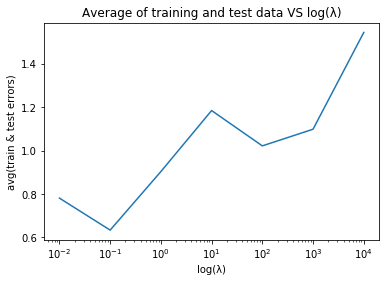

In [55]:
lamda = [0.01, 0.1,1,10,100,1000,10000]
y=[avg_error_l00_1, avg_error_l0_1, avg_error_l_1,avg_error_l_10, avg_error_l_100, avg_error_l_1000, avg_error_l_10000]
ply.semilogx(lamda, y)
ply.xlabel("log(λ)")
ply.ylabel("avg(train & test errors)")
ply.title("Average of training and test data VS log(λ)")
ply.show()

# Plotting of training and training error on one graph as a function of log(λ)

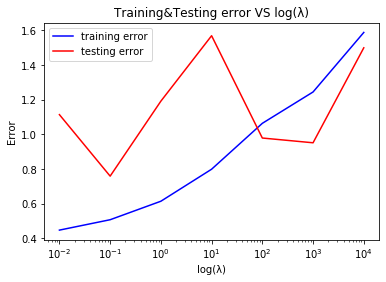

In [56]:
lamda = [0.01, 0.1,1,10,100,1000,10000]
training_error = [Mean_square_error_train_001, Mean_square_error_train_01,Mean_square_error_train_1,Mean_square_error_train_10,Mean_square_error_train_100,Mean_square_error_train_1000,Mean_square_error_train_10000]
testing_error = [Mean_square_error_test_001,Mean_square_error_test_01,Mean_square_error_test_1,Mean_square_error_test_10,Mean_square_error_test_100,Mean_square_error_test_1000,Mean_square_error_test_10000]
ply.semilogx(lamda,training_error, color="blue",label = "training error")
ply.semilogx(lamda,testing_error, color="red",label= "testing error")
ply.xlabel("log(λ)")
ply.ylabel("Error")
ply.title("Training&Testing error VS log(λ)")
ply.legend()
ply.show()

# Plotting of weights as a function of log(λ)

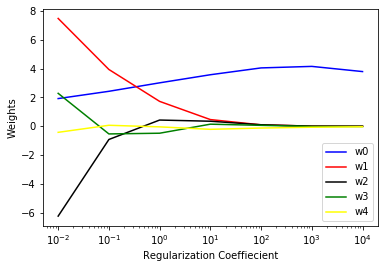

In [57]:
lamda = np.array([0.01,0.1,1,10,100,1000,10000])
#weights = np.array([w_l00_1,w_l0_1,w_l1,w_l10,w_l100,w_l1000,w_l10000])
w_l_00_1 = np.array(w_l_00_1)
w_l_0_1 = np.array(w_l_0_1)
w_l1 = np.array(w_l1)
w_l10 = np.array(w_l10)
w_l100 = np.array(w_l100)
w_l1000 = np.array(w_l1000)
w_l10000 = np.array(w_l10000)
weights_0 = np.array([w_l_00_1[0], w_l_0_1[0], w_l1[0], w_l10[0], w_l100[0],w_l1000[0],w_l10000[0]])
weights_1 = np.array([w_l_00_1[1], w_l_0_1[1], w_l1[1], w_l10[1], w_l100[1],w_l1000[1],w_l10000[1]])
weights_2 = np.array([w_l_00_1[2], w_l_0_1[2], w_l1[2], w_l10[2], w_l100[2],w_l1000[2],w_l10000[2]])
weights_3 = np.array([w_l_00_1[3], w_l_0_1[3], w_l1[3], w_l10[3], w_l100[3],w_l1000[3],w_l10000[3]])
weights_4 = np.array([w_l_00_1[4], w_l_0_1[4], w_l1[4], w_l10[4], w_l100[4],w_l1000[4],w_l10000[4]])
ply.xscale('log')
ply.plot(lamda, weights_0, color="blue",label="w0")
ply.plot(lamda, weights_1, color="red", label="w1")
ply.plot(lamda, weights_2, color="black",label="w2")
ply.plot(lamda, weights_3, color="green",label="w3")
ply.plot(lamda, weights_4, color="yellow",label="w4")
ply.xlabel("Regularization Coeffiecient")
ply.ylabel("Weights")
ply.legend()
ply.show()



# Cross Validation

In [78]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


ridge = Ridge(random_state=0, max_iter=40)
alphas = ["0.01","0.1","1","10","100","1000","10000"]

tuned_parameters = [{'alpha': alphas}]
n_folds = 5
clf = GridSearchCV(ridge, tuned_parameters, cv=n_folds, scoring="neg_mean_squared_error", refit=False)
clf.fit(X_train_fourth_polynomial, y_train)
scores = clf.cv_results_['mean_test_score']
scores

array([-1.43881895, -1.63613336, -1.30046396, -1.51702575, -2.28460879,
       -2.81476332, -3.2432502 ])

In [71]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
X_train_fourth_polynomial = np.array(X_train_fourth_polynomial)
y_train = np.array(y_train)
mse=[]
kf.get_n_splits(X_train_fourth_polynomial)
for train_index, test_index in kf.split(X_train_fourth_polynomial,y_train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_k1, X_test_k1 = X_train_fourth_polynomial[train_index], X_train_fourth_polynomial[test_index]
    y_train_k1, y_test_k1 = y_train[train_index], y_train[test_index]
    inv1 = np.linalg.inv(((X_train_k1.transpose())@(X_train_k1)) + 0.01 *(I))
    mul_1 = (inv1@(X_train_k1.transpose()))
    w_lk = (mul_1@(y_train_k1))
    y_fourth_polynomial = X_test_k1@w_lk
    Mean_square_error_train = np.square(np.subtract(y_fourth_polynomial,y_test_k1)).mean()
    mse.append(Mean_square_error_train)
print(np.mean(mse))

1.4388189470532557


In [72]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
X_train_fourth_polynomial = np.array(X_train_fourth_polynomial)
y_train = np.array(y_train)
mse=[]
kf.get_n_splits(X_train_fourth_polynomial)
KFold(n_splits=5, random_state=None, shuffle=True)
for train_index, test_index in kf.split(X_train_fourth_polynomial,y_train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_k1, X_test_k1 = X_train_fourth_polynomial[train_index], X_train_fourth_polynomial[test_index]
    y_train_k1, y_test_k1 = y_train[train_index], y_train[test_index]
    rr = Ridge(alpha=1)
    rr.fit(X_train_k1, y_train_k1)
    pred = rr.predict(X_test_k1)
    Mean_square_error_train = np.square(np.subtract(pred,y_test_k1)).mean()
    mse.append(Mean_square_error_train)
print(np.mean(mse))

1.3004639584443765


# Which λ is best fit for the and data & Is it same as regularization

No, λ value is not same for best fit as regularization. In cross validation λ = 0.01 is the best fit because of the lowest validation set error 

# Plotting of best fit test data with L2 regularized 4th order polynomial regression

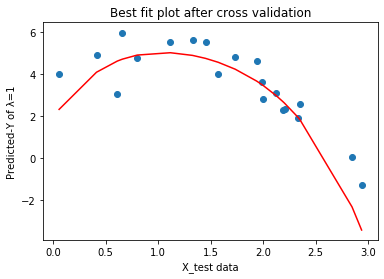

In [60]:
ply.scatter(X_test,y_test)
Y_test_regularization_1 = X_test_polynomial_fourth@w_l_00_1
ply.plot(X_test,Y_test_regularization_1,color="red")
ply.xlabel("X_test data")
ply.ylabel("Predicted-Y of λ=1")
ply.title("Best fit plot after cross validation")
ply.show()